<a href="https://colab.research.google.com/github/imomchaubey/pyhon_assignment89/blob/main/assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
import string
text = "Text Preprocessing is the initial step in any NLP task where raw text is cleaned and prepared for analysis. This helps in reducing noise and better model performance."
text_lower = text.lower()
text_clean = text_lower.translate(str.maketrans('','', string.punctuation))
print("Cleaned Text : ", text_clean)

Cleaned Text :  text preprocessing is the initial step in any nlp task where raw text is cleaned and prepared for analysis this helps in reducing noise and better model performance


Word Tokens:  ['text', 'preprocessing', 'is', 'the', 'initial', 'step', 'in', 'any', 'nlp', 'task', 'where', 'raw', 'text', 'is', 'cleaned', 'and', 'prepared', 'for', 'analysis', 'this', 'helps', 'in', 'reducing', 'noise', 'and', 'better', 'model', 'performance']
Sentence Tokens:  ['Text Preprocessing is the initial step in any NLP task where raw text is cleaned and prepared for analysis.', 'This helps in reducing noise and better model performance.']
Filtered Words: ['text', 'preprocessing', 'initial', 'step', 'nlp', 'task', 'raw', 'text', 'cleaned', 'prepared', 'analysis', 'helps', 'reducing', 'noise', 'better', 'model', 'performance']


<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

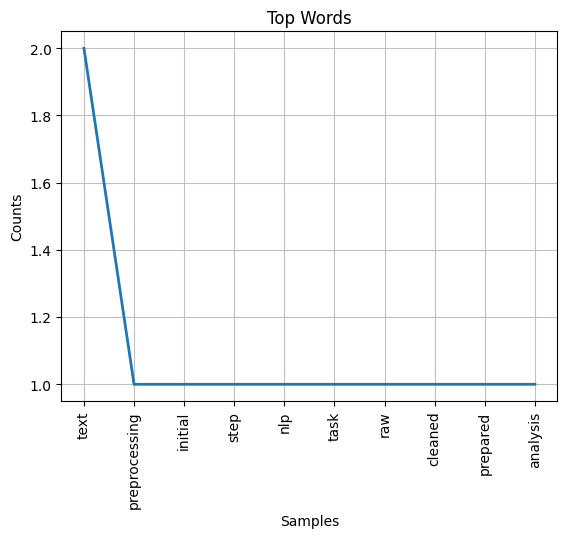

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

word_tokens = word_tokenize(text_clean)
sent_tokens = sent_tokenize(text)
print("Word Tokens: ", word_tokens)
print("Sentence Tokens: ", sent_tokens)
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in word_tokens if w.lower() not in stop_words]
print("Filtered Words:" ,filtered_words)
fd = FreqDist(filtered_words)
fd.plot(10, title="Top Words")

In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
ps = PorterStemmer()
lm = WordNetLemmatizer()

for word in filtered_words:
    print(f"{word} -> Stemmed : {ps.stem(word)}, Lemmatized: {lm.lemmatize(word)}")

text -> Stemmed : text, Lemmatized: text
preprocessing -> Stemmed : preprocess, Lemmatized: preprocessing
initial -> Stemmed : initi, Lemmatized: initial
step -> Stemmed : step, Lemmatized: step
nlp -> Stemmed : nlp, Lemmatized: nlp
task -> Stemmed : task, Lemmatized: task
raw -> Stemmed : raw, Lemmatized: raw
text -> Stemmed : text, Lemmatized: text
cleaned -> Stemmed : clean, Lemmatized: cleaned
prepared -> Stemmed : prepar, Lemmatized: prepared
analysis -> Stemmed : analysi, Lemmatized: analysis
helps -> Stemmed : help, Lemmatized: help
reducing -> Stemmed : reduc, Lemmatized: reducing
noise -> Stemmed : nois, Lemmatized: noise
better -> Stemmed : better, Lemmatized: better
model -> Stemmed : model, Lemmatized: model
performance -> Stemmed : perform, Lemmatized: performance


In [6]:
import re

text = "You can reach me at abc@example.com or cal me at +91 9871237590. "

email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
text = re.sub(email_pattern, '<EMAIL>', text)

url_pattern = r'https?://[^\s]+'
text = re.sub(url_pattern, '<URL>', text)

phone_pattern = r'(\+?\d{1,2}\s?)?(\(?\d{3}\)?[\s\-]?)?\d{3}[\s\-]?\d{4}'
text = re.sub(phone_pattern, '<PHONE>', text)

In [7]:
text = "Text Preprocessing is the initial step in any NLP task where raw text is cleaned and prepared for analysis. This helps in reducing noise and better model performance."

long_words = re.findall(r'\b\w{6,}\b', text)
print("Words with more than 5 letters:", long_words)
numbers = re.findall(r'\b\d+\b', text)
print("Numbers in the text:", numbers)
capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', text)
print("Capitalized words:", capitalized_words)

words = re.findall(r'[a-zA-Z]+', text)
print("Words with only alphabets:", words)
vowel_words = re.findall(r'\b[aeiouAEIOU][a-zA-Z]*\b', text)
print("Words starting with a vowel:", vowel_words)

Words with more than 5 letters: ['Preprocessing', 'initial', 'cleaned', 'prepared', 'analysis', 'reducing', 'better', 'performance']
Numbers in the text: []
Capitalized words: ['Text', 'Preprocessing', 'This']
Words with only alphabets: ['Text', 'Preprocessing', 'is', 'the', 'initial', 'step', 'in', 'any', 'NLP', 'task', 'where', 'raw', 'text', 'is', 'cleaned', 'and', 'prepared', 'for', 'analysis', 'This', 'helps', 'in', 'reducing', 'noise', 'and', 'better', 'model', 'performance']
Words starting with a vowel: ['is', 'initial', 'in', 'any', 'is', 'and', 'analysis', 'in', 'and']


In [9]:
import re
text = """
You can reach me at john.doe@example.com or visit my website at https://www.example.com.
My phone number is 123-456-7890 and you can also contact me at +91 9876543210.
Isn't this a state-of-the-art system? It costs 3.14 dollars.
"""

def custom_tokenizer(text):
    # Regex pattern explanation:
    # 1. Decimal numbers (\d+\.\d+)
    # 2. Whole numbers (\d+)
    # 3. Hyphenated words (state-of-the-art)
    # 4. Words with contractions (isn't, you're)
    # 5. Regular words

    pattern = r"""
        \d+\.\d+              | # decimal numbers
        \d+                   | # integers
        \b\w+(?:-\w+)+\b      | # hyphenated words
        \b\w+'(?:\w+)?\b      | # contractions like isn't, you're
        \b\w+\b                 # normal words
    """

    # Find all matches
    tokens = re.findall(pattern, text, re.VERBOSE)

    return tokens


In [10]:
import re

# Original text (from Q1)
text = """
Technology is evolving faster than ever. From smartphones to artificial intelligence, it is changing our daily lives.
I find it fascinating how innovations make tasks more efficient and communication easier.
New gadgets and apps continue to surprise us with their capabilities.
Technology also plays a crucial role in education and healthcare, improving access and outcomes.
I enjoy exploring new tech trends and understanding how they impact our world.
Contact me at techguru@example.com or visit https://techupdates.com.
You can also reach me at +91 9876543210 or 123-456-7890 for more info.
"""

# Step 1: Regex substitutions
text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '<EMAIL>', text)  # email
text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)         # URLs
text = re.sub(r'(\+?\d{1,3}[\s-]?)?\d{3}[\s-]?\d{3}[\s-]?\d{4}', '<PHONE>', text)  # phone numbers

# Step 2: Custom tokenizer
def custom_tokenizer(text):
    # Keep contractions, decimal numbers, and hyphenated words
    pattern = r"\b\w+(?:[-']\w+)*\b|\d+\.\d+"
    tokens = re.findall(pattern, text)
    return tokens

tokens = custom_tokenizer(text)

# Output
print("Cleaned & Tokenized Text:")
print(tokens)


Cleaned & Tokenized Text:
['Technology', 'is', 'evolving', 'faster', 'than', 'ever', 'From', 'smartphones', 'to', 'artificial', 'intelligence', 'it', 'is', 'changing', 'our', 'daily', 'lives', 'I', 'find', 'it', 'fascinating', 'how', 'innovations', 'make', 'tasks', 'more', 'efficient', 'and', 'communication', 'easier', 'New', 'gadgets', 'and', 'apps', 'continue', 'to', 'surprise', 'us', 'with', 'their', 'capabilities', 'Technology', 'also', 'plays', 'a', 'crucial', 'role', 'in', 'education', 'and', 'healthcare', 'improving', 'access', 'and', 'outcomes', 'I', 'enjoy', 'exploring', 'new', 'tech', 'trends', 'and', 'understanding', 'how', 'they', 'impact', 'our', 'world', 'Contact', 'me', 'at', 'EMAIL', 'or', 'visit', 'URL', 'You', 'can', 'also', 'reach', 'me', 'at', 'PHONE', 'or', 'PHONE', 'for', 'more', 'info']
